In [134]:
import pandas as pd
df = pd.read_csv('/Users/dmb/Desktop/IRONHACK/week4/first_project/data/raw/amazon_sales_data 2025.csv')
df

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,14-03-25,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,20-03-25,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,15-02-25,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,19-02-25,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,10-03-25,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending
...,...,...,...,...,...,...,...,...,...,...,...
245,ORD0246,17-03-25,T-Shirt,Clothing,20,2,40,Daniel Harris,Miami,Debit Card,Cancelled
246,ORD0247,30-03-25,Jeans,Clothing,40,1,40,Sophia Miller,Dallas,Debit Card,Cancelled
247,ORD0248,05-03-25,T-Shirt,Clothing,20,2,40,Chris White,Denver,Debit Card,Cancelled
248,ORD0249,08-03-25,Smartwatch,Electronics,150,3,450,Emily Johnson,New York,Debit Card,Cancelled


In [6]:
list (df.columns)

['Order ID',
 'Date',
 'Product',
 'Category',
 'Price',
 'Quantity',
 'Total Sales',
 'Customer Name',
 'Customer Location',
 'Payment Method',
 'Status']

In [8]:
df.nunique()

Order ID             250
Date                  60
Product               10
Category               5
Price                 10
Quantity               5
Total Sales           36
Customer Name         10
Customer Location     10
Payment Method         5
Status                 3
dtype: int64

In [10]:
df.dtypes

Order ID             object
Date                 object
Product              object
Category             object
Price                 int64
Quantity              int64
Total Sales           int64
Customer Name        object
Customer Location    object
Payment Method       object
Status               object
dtype: object

In [12]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Order ID           250 non-null    object
 1   Date               250 non-null    object
 2   Product            250 non-null    object
 3   Category           250 non-null    object
 4   Price              250 non-null    int64 
 5   Quantity           250 non-null    int64 
 6   Total Sales        250 non-null    int64 
 7   Customer Name      250 non-null    object
 8   Customer Location  250 non-null    object
 9   Payment Method     250 non-null    object
 10  Status             250 non-null    object
dtypes: int64(3), object(8)
memory usage: 21.6+ KB


In [16]:
df.Category.unique()  # Checking unique values from the different values from table

array(['Footwear', 'Electronics', 'Clothing', 'Books', 'Home Appliances'],
      dtype=object)

In [18]:
df['Customer Location'].unique()


array(['New York', 'San Francisco', 'Denver', 'Dallas', 'Houston',
       'Miami', 'Boston', 'Seattle', 'Los Angeles', 'Chicago'],
      dtype=object)

In [20]:
df['Payment Method'].unique()

array(['Debit Card', 'Amazon Pay', 'Credit Card', 'PayPal', 'Gift Card'],
      dtype=object)

In [22]:
df['Price'].unique()

array([  60,  100,  150,   20,  500,   15,   40,  800,  600, 1200])

In [24]:
df['Status'].str.split(',').explode().value_counts().nlargest(3).to_dict()  # Ordering and ranking top values and it counts

{'Completed': 88, 'Pending': 85, 'Cancelled': 77}

In [26]:
df['Payment Method'].str.split(',').explode().value_counts().nlargest(5).to_dict()

{'PayPal': 60,
 'Credit Card': 54,
 'Debit Card': 53,
 'Gift Card': 42,
 'Amazon Pay': 41}

In [28]:
df['Customer Location'].str.split(',').explode().value_counts().nlargest(5).to_dict()

{'Houston': 32, 'Miami': 31, 'Dallas': 29, 'New York': 26, 'Denver': 26}

In [30]:
df['Category'].str.split(',').explode().value_counts().nlargest(5).to_dict()

{'Electronics': 118,
 'Clothing': 40,
 'Home Appliances': 40,
 'Footwear': 27,
 'Books': 25}

In [112]:
total_sales_sum = df['Total Sales'].sum()  #Calculating total sums of all the categories
print(total_sales_sum)

1330


In [114]:
def add_higher_price_column(df):
    # Adding a column 'Higher Price' based on some condition
    # Assuming you want to mark prices above a certain threshold (e.g., 100)
    df['Higher Price'] = df['Price'].apply(lambda x: 'Yes' if x > 100 else 'No')
    return df

# Example usage:
data = {
    'Order ID': ['ORD0001', 'ORD0002', 'ORD0003', 'ORD0004', 'ORD0005'],
    'Date': ['14-03-25', '20-03-25', '15-02-25', '19-02-25', '10-03-25'],
    'Product': ['Running Shoes', 'Headphones', 'Running Shoes', 'Running Shoes', 'Smartwatch'],
    'Category': ['Footwear', 'Electronics', 'Footwear', 'Footwear', 'Electronics'],
    'Price': [60, 100, 60, 60, 150],
    'Quantity': [3, 4, 2, 3, 3],
    'Total Sales': [180, 400, 120, 180, 450],
    'Customer Name': ['Emma Clark', 'Emily Johnson', 'John Doe', 'Olivia Wilson', 'Emma Clark'],
    'Customer Location': ['New York', 'San Francisco', 'Denver', 'Dallas', 'New York'],
    'Payment Method': ['Debit Card', 'Debit Card', 'Amazon Pay', 'Credit Card', 'Debit Card'],
    'Status': ['Cancelled', 'Pending', 'Cancelled', 'Pending', 'Pending']
}

df = pd.DataFrame(data)

# Add 'Higher Price' column
df = add_higher_price_column(df)
print(df)

  Order ID      Date        Product     Category  Price  Quantity  \
0  ORD0001  14-03-25  Running Shoes     Footwear     60         3   
1  ORD0002  20-03-25     Headphones  Electronics    100         4   
2  ORD0003  15-02-25  Running Shoes     Footwear     60         2   
3  ORD0004  19-02-25  Running Shoes     Footwear     60         3   
4  ORD0005  10-03-25     Smartwatch  Electronics    150         3   

   Total Sales  Customer Name Customer Location Payment Method     Status  \
0          180     Emma Clark          New York     Debit Card  Cancelled   
1          400  Emily Johnson     San Francisco     Debit Card    Pending   
2          120       John Doe            Denver     Amazon Pay  Cancelled   
3          180  Olivia Wilson            Dallas    Credit Card    Pending   
4          450     Emma Clark          New York     Debit Card    Pending   

  Higher Price  
0           No  
1           No  
2           No  
3           No  
4          Yes  


In [141]:
def total_sales_by_category_and_status(df: pd.DataFrame) -> pd.DataFrame:
    #  Total Sales by Category and Status
    summary = pd.pivot_table(
        df,
        values='Total Sales',
        index='Category',
        columns='Status',
        aggfunc='sum',
        fill_value=0
    )
    return summary


display(total_sales_by_category_and_status(df))

Status,Cancelled,Completed,Pending
Category,,,
Books,180,210,645
Clothing,1120,1400,1020
Electronics,26650,55900,47400
Footwear,1080,1620,1620
Home Appliances,36000,29400,39600


In [38]:
def print_total_quantity(df):       # Calculating the quantity of total products sold
    print(df['Quantity'].sum())
print_total_quantity(df)

714


In [40]:
def print_completed_sales(df):  
    print(df[df['Status'] == 'Completed']['Total Sales'].sum())
print_completed_sales(df)

88530


In [42]:
def print_pending_sales(df):
    print(df[df['Status'] == 'Pending']['Total Sales'].sum())
print_pending_sales(df)

90285


In [44]:
def print_cancelled_sales(df):
    print(df[df['Status'] == 'Cancelled']['Total Sales'].sum())
print_cancelled_sales(df)

65030


In [46]:
def describe_data(df):
    return df.describe()
summary = describe_data(df)
display(summary)

,Price,Quantity,Total Sales
count,250.000000,250.000000,250.000000
mean,343.580000,2.856000,975.380000
std,380.635808,1.429489,1252.112254
min,15.000000,1.000000,15.000000
25%,40.000000,2.000000,100.000000
50%,150.000000,3.000000,400.000000
75%,600.000000,4.000000,1500.000000
max,1200.000000,5.000000,6000.000000


In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

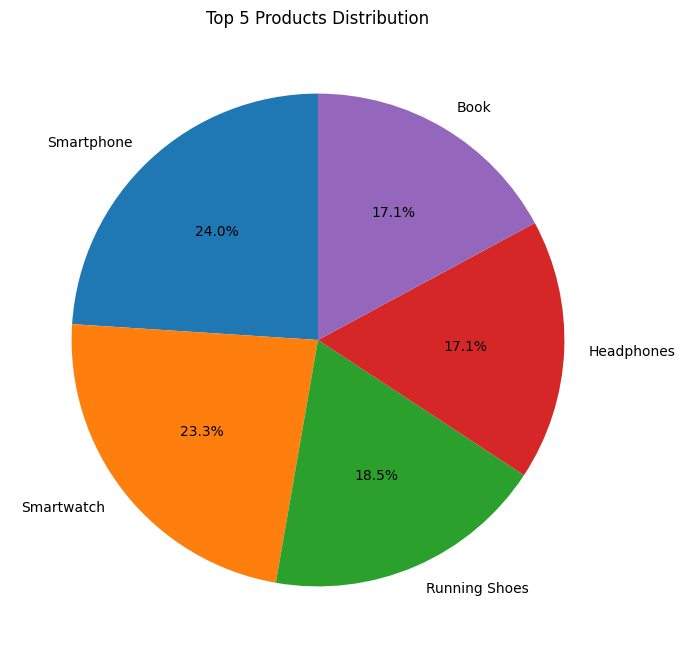

In [62]:
def show_top_products_pie(df):         #Displaying results using pie chart
    top_products = df['Product'].value_counts().head(5)
    top_products.plot.pie(autopct='%1.1f%%', figsize=(8, 8), startangle=90)
    plt.title('Top 5 Products Distribution')
    plt.ylabel('')  
    plt.show()
show_top_products_pie(df)

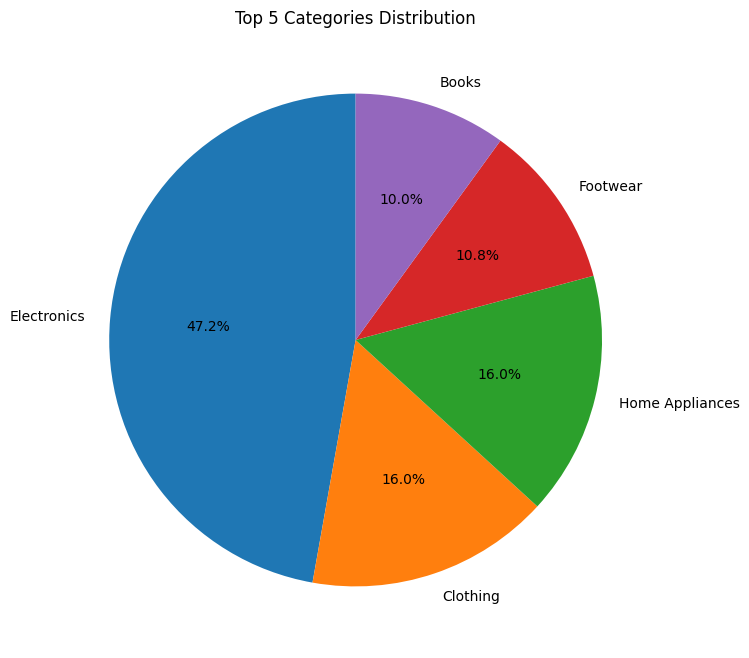

In [64]:
def show_top_categories_pie(df):
    top_categories = df['Category'].value_counts().head(5)
    top_categories.plot.pie(autopct='%1.1f%%', figsize=(8, 8), startangle=90)
    plt.title('Top 5 Categories Distribution')
    plt.ylabel('')  
    plt.show()
show_top_categories_pie(df)

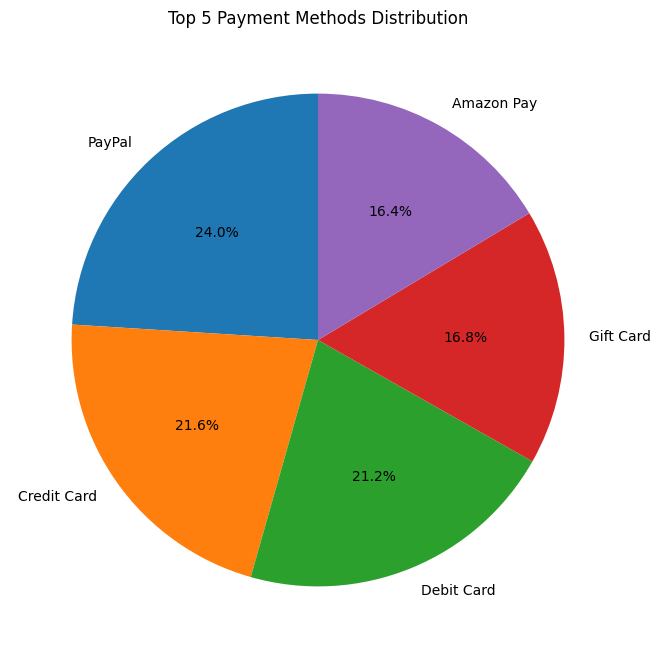

In [66]:
def show_top_payment_methods_pie(df):
    top_payment_methods = df['Payment Method'].value_counts().head(5)
    top_payment_methods.plot.pie(autopct='%1.1f%%', figsize=(8, 8), startangle=90)
    plt.title('Top 5 Payment Methods Distribution')
    plt.ylabel('') 
    plt.show()
show_top_payment_methods_pie(df)

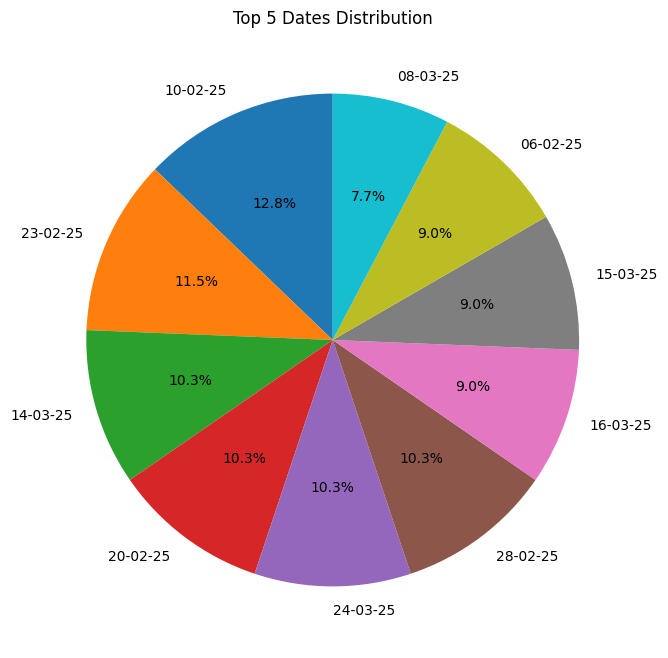

In [82]:
def show_top_dates_pie(df):
    top_payment_methods = df['Date'].value_counts().head(10)
    top_payment_methods.plot.pie(autopct='%1.1f%%', figsize=(8, 8), startangle=90)
    plt.title('Top 5 Dates Distribution')
    plt.ylabel('')  
    plt.show()
show_top_dates_pie(df)

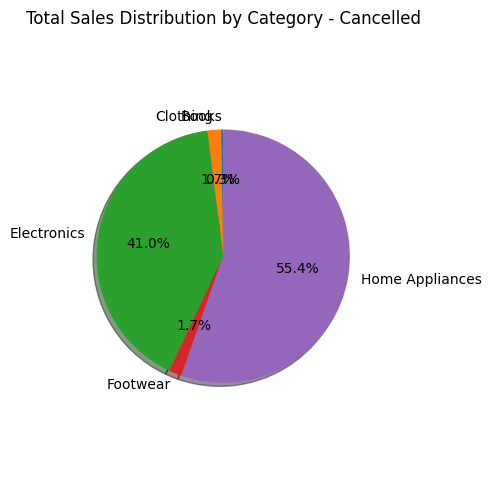

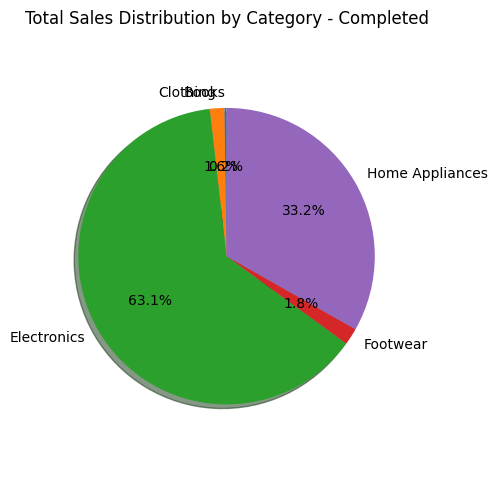

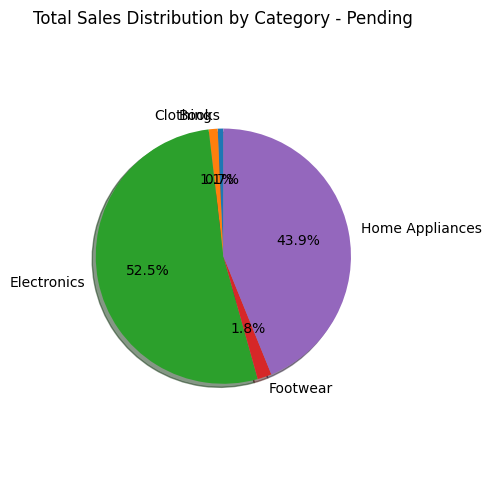

Status,Cancelled,Completed,Pending
Category,,,
Books,180,210,645
Clothing,1120,1400,1020
Electronics,26650,55900,47400
Footwear,1080,1620,1620
Home Appliances,36000,29400,39600


In [143]:
def total_sales_by_category_and_status(df: pd.DataFrame) -> pd.DataFrame:
    # Calculate total sales by category and status
    summary = pd.pivot_table(
        df,
        values='Total Sales',
        index='Category',
        columns='Status',
        aggfunc='sum',
        fill_value=0
    )

    # Plot pie chart for each status
    for status in summary.columns:
        plt.figure(figsize=(5, 5))
        plt.pie(
            summary[status],
            labels=summary.index,
            autopct='%1.1f%%',
            startangle=90,
            shadow=True
        )
        plt.title(f'Total Sales Distribution by Category - {status}')
        plt.axis('equal')  
        plt.tight_layout()
        plt.show()

    return summary

# Example usage
total_sales_by_category_and_status(df)